In [665]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [666]:
delivery = pd.read_csv('data/deliveries.csv')
match = pd.read_csv('data/matches.csv')

In [667]:
match.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [668]:
match.shape

(756, 18)

In [669]:
delivery.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [670]:
print(delivery.head(1))

   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  

[1 rows x 21 columns]


In [671]:
delivery.shape

(179078, 21)

In [672]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [673]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [674]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [675]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


<Axes: >

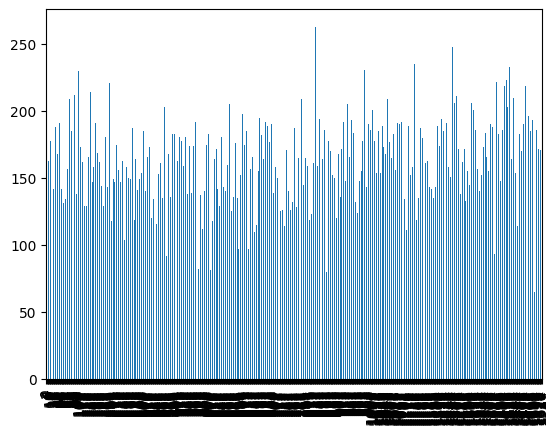

In [676]:
total_score_df['total_runs'].plot(kind='bar')

In [677]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [678]:
match_df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183


In [679]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [680]:
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals'
]

In [681]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [682]:
match_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              2
umpire2              2
umpire3            522
match_id             0
total_runs           0
dtype: int64

In [683]:
# match_df = match_df.dropna()

In [684]:
match_df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178


In [685]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [686]:
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [687]:
match_df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178


In [688]:
match_df = match_df[match_df['dl_applied'] == 0]

In [689]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [690]:
delivery_df = match_df.merge(delivery,on='match_id')

In [691]:
delivery_df =delivery_df[delivery_df['inning']==2]

In [692]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [693]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [694]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1


In [695]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score'] + 1

In [696]:
delivery_df['balls_left'] = 126 - (delivery_df['over'] * 6 + delivery_df['ball'])

In [697]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117


In [698]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)

delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x == 0  else 1)

In [699]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [700]:
delivery_df['wickets'] = 10 - wickets

In [701]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10


In [702]:
delivery_df['crr'] = delivery_df.current_score * 6 / (120 - delivery_df.balls_left)

In [703]:
delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,207,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,117,10,2.0


In [704]:
delivery_df['rrr'] = delivery_df.runs_left * 6 / delivery_df.balls_left

In [705]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.000000,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.000000,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.000000,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.500000,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,1,4,5,7.862069,1.500000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-1,3,5,7.897436,-2.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-2,2,4,7.881356,-6.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-4,1,4,7.915966,-24.000000


In [706]:
delivery_df = delivery_df.reset_index()

In [707]:
delivery_df

,index,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
0,125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,1,0,NaN,NaN,1,207,119,10,6.000000,10.436975
1,126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,NaN,NaN,1,207,118,10,3.000000,10.525424
2,127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,NaN,NaN,1,207,117,10,2.000000,10.615385
3,128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,2,0,NaN,NaN,3,205,116,10,4.500000,10.603448
4,129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,4,0,NaN,NaN,7,201,115,10,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72408,149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,...,1,0,NaN,NaN,152,1,4,5,7.862069,1.500000
72409,149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,...,2,0,NaN,NaN,154,-1,3,5,7.897436,-2.000000
72410,149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,...,1,1,run out,KH Pandya,155,-2,2,4,7.881356,-6.000000
72411,149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,...,2,0,NaN,NaN,157,-4,1,4,7.915966,-24.000000


In [708]:
delivery_df.drop(columns='index',inplace=True)

In [709]:
delivery_df.head(4)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448


In [710]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner

In [711]:
delivery_df['winner'] = is_win(delivery_df)

In [712]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets', 'crr', 'rrr'],
      dtype='object')

In [713]:
final_df = delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]

In [714]:
final_df.head(3)

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.0,10.436975,0
1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.0,10.525424,0
2,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.0,10.615385,0


In [715]:
final_df = final_df.sample(final_df.shape[0])

In [716]:
final_df.head()

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
26879,292,Mumbai Indians,Deccan Chargers,Mumbai,131,114,10,135,5.000000,6.894737,0
29622,325,Kolkata Knight Riders,Kings XI Punjab,Kolkata,125,112,10,134,7.500000,6.696429,0
20215,210,Deccan Chargers,Rajasthan Royals,Nagpur,48,40,7,159,8.400000,7.200000,0
17572,188,Royal Challengers Bangalore,Mumbai Indians,Mumbai,67,62,10,151,8.793103,6.483871,1
15551,171,Deccan Chargers,Royal Challengers Bangalore,Centurion,159,108,10,170,6.000000,8.833333,0


In [717]:
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [718]:
final_df['city'].unique()

array(['Mumbai', 'Kolkata', 'Nagpur', 'Centurion', 'Ahmedabad',
       'Bangalore', 'Delhi', 'Hyderabad', 'Sharjah', 'Chandigarh', 'Pune',
       'Kimberley', 'Durban', 'Port Elizabeth', 'Mohali', 'Chennai',
       'Johannesburg', 'Bengaluru', nan, 'Indore', 'Ranchi', 'Raipur',
       'Cuttack', 'Jaipur', 'Abu Dhabi', 'Bloemfontein', 'Dharamsala',
       'Visakhapatnam', 'Cape Town', 'East London'], dtype=object)

In [719]:
final_df.batting_team.unique()

array(['Mumbai Indians', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Delhi Capitals', 'Kings XI Punjab', 'Chennai Super Kings'],
      dtype=object)

In [720]:
final_df.bowling_team.unique()

array(['Sunrisers Hyderabad', 'Kings XI Punjab', 'Rajasthan Royals',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Chennai Super Kings'],
      dtype=object)

In [721]:
final_df

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
26879,292,Mumbai Indians,Sunrisers Hyderabad,Mumbai,131,114,10,135,5.000000,6.894737,0
29622,325,Kolkata Knight Riders,Kings XI Punjab,Kolkata,125,112,10,134,7.500000,6.696429,0
20215,210,Sunrisers Hyderabad,Rajasthan Royals,Nagpur,48,40,7,159,8.400000,7.200000,0
17572,188,Royal Challengers Bangalore,Mumbai Indians,Mumbai,67,62,10,151,8.793103,6.483871,1
15551,171,Sunrisers Hyderabad,Royal Challengers Bangalore,Centurion,159,108,10,170,6.000000,8.833333,0
...,...,...,...,...,...,...,...,...,...,...,...
6344,86,Mumbai Indians,Rajasthan Royals,Mumbai,31,49,7,103,6.169014,3.795918,1
32855,361,Chennai Super Kings,Rajasthan Royals,Jaipur,86,76,8,126,5.590909,6.789474,1
45885,493,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,89,61,9,157,7.016949,8.754098,1
22839,233,Royal Challengers Bangalore,Sunrisers Hyderabad,Mumbai,50,83,10,82,5.351351,3.614458,1


In [722]:
import random
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Kings XI Punjab':'Mumbai',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city

final_df['city']=final_df.apply(fill_city,axis=1)

In [723]:
final_df.dropna(inplace=True)

In [724]:
# final_df.dropna(inplace=True)
final_df =final_df[final_df.balls_left !=0]

In [725]:
final_df

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,winner
26879,292,Mumbai Indians,Sunrisers Hyderabad,Mumbai,131,114,10,135,5.000000,6.894737,0
29622,325,Kolkata Knight Riders,Kings XI Punjab,Kolkata,125,112,10,134,7.500000,6.696429,0
20215,210,Sunrisers Hyderabad,Rajasthan Royals,Nagpur,48,40,7,159,8.400000,7.200000,0
17572,188,Royal Challengers Bangalore,Mumbai Indians,Mumbai,67,62,10,151,8.793103,6.483871,1
15551,171,Sunrisers Hyderabad,Royal Challengers Bangalore,Centurion,159,108,10,170,6.000000,8.833333,0
...,...,...,...,...,...,...,...,...,...,...,...
6344,86,Mumbai Indians,Rajasthan Royals,Mumbai,31,49,7,103,6.169014,3.795918,1
32855,361,Chennai Super Kings,Rajasthan Royals,Jaipur,86,76,8,126,5.590909,6.789474,1
45885,493,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,89,61,9,157,7.016949,8.754098,1
22839,233,Royal Challengers Bangalore,Sunrisers Hyderabad,Mumbai,50,83,10,82,5.351351,3.614458,1


In [726]:
# final_df.drop(columns=['match_id'])

In [727]:
from sklearn.model_selection import train_test_split

final_df.drop(columns=['match_id'], inplace=True)

x = final_df.drop(columns=['winner'])
y = final_df['winner']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\emon1\AppData\Local\Temp\ipykernel_8224\224226916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['match_id'], inplace=True)


In [728]:
x

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
26879,Mumbai Indians,Sunrisers Hyderabad,Mumbai,131,114,10,135,5.000000,6.894737
29622,Kolkata Knight Riders,Kings XI Punjab,Kolkata,125,112,10,134,7.500000,6.696429
20215,Sunrisers Hyderabad,Rajasthan Royals,Nagpur,48,40,7,159,8.400000,7.200000
17572,Royal Challengers Bangalore,Mumbai Indians,Mumbai,67,62,10,151,8.793103,6.483871
15551,Sunrisers Hyderabad,Royal Challengers Bangalore,Centurion,159,108,10,170,6.000000,8.833333
...,...,...,...,...,...,...,...,...,...
6344,Mumbai Indians,Rajasthan Royals,Mumbai,31,49,7,103,6.169014,3.795918
32855,Chennai Super Kings,Rajasthan Royals,Jaipur,86,76,8,126,5.590909,6.789474
45885,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,89,61,9,157,7.016949,8.754098
22839,Royal Challengers Bangalore,Sunrisers Hyderabad,Mumbai,50,83,10,82,5.351351,3.614458


In [729]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [730]:
ohe = OneHotEncoder()
ohe.fit_transform(x.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [732]:
pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
pipe.fit(x_train,y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab...
       'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack',
       'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad',
       'Indore', 'Jaipur', 'Johannesburg', 'Kimberley', 'Kolkata',
       'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur',
       'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)],
                                                                drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [733]:
y_pred = pipe.predict_proba(x_test)
y_pred

array([[0.18554768, 0.81445232],
       [0.31649503, 0.68350497],
       [0.07888484, 0.92111516],
       ...,
       [0.22292147, 0.77707853],
       [0.95768356, 0.04231644],
       [0.79945409, 0.20054591]])

In [734]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [735]:
temp_df ,target =match_progression(delivery_df,513,pipe)

Target- 189


Text(0.5, 1.0, 'Target-189')

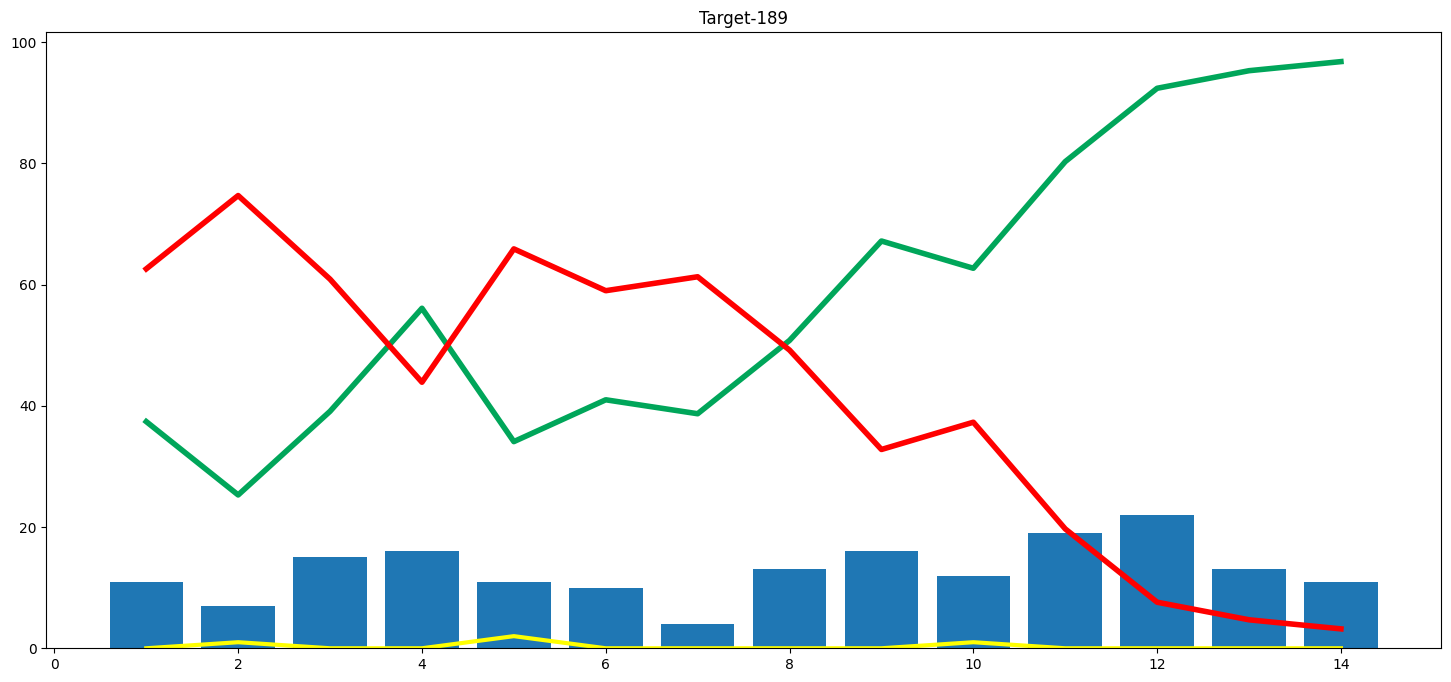

In [736]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [737]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [738]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [739]:
import pickle
pickle.dump(pipe,open('model/pipe.pkl','wb'))

In [740]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
23621,Mumbai Indians,Royal Challengers Bangalore,Bangalore,108,96,10,140,8.250000,6.750000
37647,Mumbai Indians,Kolkata Knight Riders,Kolkata,156,115,10,159,4.800000,8.139130
37473,Chennai Super Kings,Rajasthan Royals,Chennai,76,47,9,185,9.041096,9.702128
37089,Chennai Super Kings,Kolkata Knight Riders,Kolkata,98,96,10,119,5.500000,6.125000
30106,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,77,89,10,124,9.290323,5.191011
...,...,...,...,...,...,...,...,...,...
20640,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,154,86,9,184,5.470588,10.744186
57960,Delhi Capitals,Mumbai Indians,Visakhapatnam,98,29,4,206,7.186813,20.275862
39119,Sunrisers Hyderabad,Delhi Capitals,Hyderabad,21,52,6,80,5.294118,2.423077
25301,Delhi Capitals,Kolkata Knight Riders,Delhi,96,65,8,148,5.781818,8.861538
